<a href="https://colab.research.google.com/github/Dieljr/README/blob/main/Linear_Regression_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conteúdo para aulas online
## Primeiro Notebook: Linear Regression

### O Objetivo desse notebook é o de apresentar recursos intermediários a avançados sobre o Algoritmo Linear Regression do SKLearn, da classe dos modelos linearers (Linear Model).

### <font color = '#CD5C5C'>OBJETIVO DA REGRESSÃO LINEAR:</font>
Seu objetivo é traçar um relação entre a variável target e as variáveis preditoras.
Os problemas a serem evitados são as variáveis que não são preditoras e quais causam multicolinearidade.

Na verdade, esse é o algoritmo mais simples dentre os da classe de regressão do sklearn.

### <font color = '#CD5C5C'>1. Source:</font> 
a) https://scikit-learn.org/stable/modules/linear_model.html#linear-model

b) https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_1?crid=2JG8SYAU8K3UQ&keywords=tensorflow&qid=1646567493&s=books&sprefix=tensort+flow%2Cstripbooks%2C229&sr=1-1&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9

c) https://www.amazon.com.br/An%C3%A1lise-Dados-com-Python-Pandas/dp/8575226991/ref=sr_1_1?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&keywords=analise+de+dados+com+python&qid=1646671469&sr=8-1&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9


### <font color = '#CD5C5C'>2. Fórmula:</font>
y^(w,x)=w0+w1x1+...+wpxp (sklearn)

LM busca minimizar a RMSE ( Root Mean Squared Error), isto é, encontrar o w que minimize Raiz do Erro Quadrado Médio.


### <font color = '#CD5C5C'>3. Parametros ou hiperparametros:</font>
Para você que está começando, pode parecer estranho e confuso, mas é assim que a comunidade em Ciência de Dados se refere ajustadores dos algoritmos de machine learning. Então, vá se acostumando!
Irei apresentar somente os mais importantes parametros que o ajudará no seu dia-a-dia como cientista de dados.

class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False):

a) normalize: está obsoleto desde a versão 1.0;

b) n_jobs: diz respeito ao uso dos núcleos da CPU e exige conhecimento intermediário sobre seu hardware e sobre seu trabalho com dados. Por padrão é None (nenhum) = 1. Se for especificado outro valor (sempre número inteiro) como -1 (todos os núcleos são usados) ou -2 (todos menos um) ou -3 (todos menos dois) etc. A escolha desses valores pode otimizar o processamento.


Atributos: ou o que se pode extrair do algoritmo depois que ele for usado. Melhor do que explicá-los aqui (teoria), é apresentá-los na prática!

## NA PRÁTICA:

In [ ]:
# Carregar pacotes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb

import sys

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [ ]:
# Veja a versão do seu Python
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [ ]:
# Carregar dataset
df = pd.read_csv('mpg.csv', sep = ';', names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'accelaration',
                                              'model_year', 'origin', 'car_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   accelaration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        1 non-null      object 
 8   car_name      0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


### Pequenos ajustes

In [ ]:
# Não precisaremos das duas últimas colunas
del df['origin']
del df['car_name']

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,accelaration,model_year
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0


In [ ]:
# Podemos descartar os valores missing
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   accelaration  392 non-null    float64
 6   model_year    392 non-null    float64
dtypes: float64(7)
memory usage: 24.5 KB


In [ ]:
# Separar as variáveis para o algoritmo
X = df.drop(['mpg'], axis = 1)
y = df['mpg']

# Ver os formatos
print(X.shape, y.shape)

(392, 6) (392,)


In [ ]:
# Normalizar o conjunto das features, pois o algoritmo exige para dados não normalizados
scale = StandardScaler()
X_scale = scale.fit_transform(X)

In [ ]:
# Dividir em dados treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_scale, y, test_size = 0.3, random_state = 100)

### Não há muitas opções para hiperparametros, então o que veremos é a interpretação dos atributos:

In [ ]:
# Criar objeto LinearRegression
lr = LinearRegression()

# Treinar objeto
model_lr = lr.fit(X_treino, y_treino)

In [ ]:
# Cria previsões
predict_lr = lr.predict(X_teste)

### Compreendendo as atributos
#### Os principais atributos que devem ser observados são: os coeficientes, o intercepto (y), e o R quadrado.
### IMPORTANTE:
#### <font color  = '#FF0033'>Ao final, deve-se fazer a avaliação de cada coeficiente</font>

In [ ]:
# Avaliar o aprendizado pelo coeficiente de determinação (r2) com dados de treinamento
print('Com dados de treino foi registrado um R squared de ', lr.score(X_treino, y_treino)*100)

print('')

print('Com dados de teste foi resgistrado um R squared de ',lr.score(X_teste, y_teste)*100)

Com dados de treino atingiu um R squared de  80.95210048346138

Com dados de teste atingiu um R squared de  79.75278702972504


#### Os scores dos dados de treino e de teste apresentam resultados bem próximos!

In [ ]:
# Variável independente (intercept_): valor que cruza o eixo y.
# A partir deste valor é que você encontra os valores de x em um plano cartesiano
# É o valor multiplicador de previsão propriamente dito.

print('y é igual a',model_lr.intercept_, 'quando X é zero(0)')

y é igual a 23.56144149999266 quando X é zero(0)


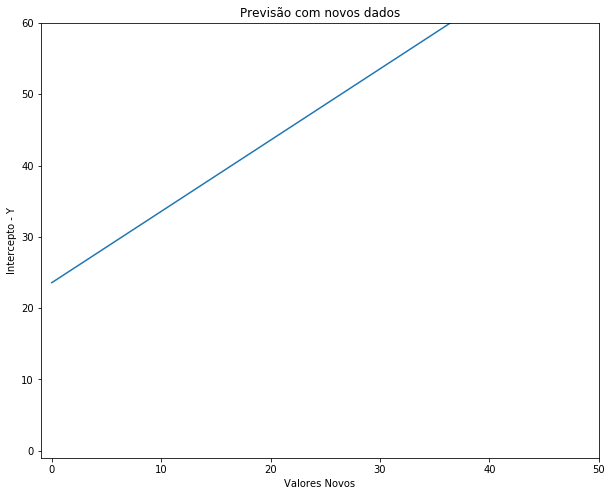

In [ ]:
# Observe o gráfico com dados novos, ele começa exatamente em y = 23.56
novos = np.arange(0,50)

plt.figure(figsize = (10,8))
plt.plot(model_lr.intercept_ + novos)
plt.xlabel('Valores Novos')
plt.ylabel('Intercepto - Y')
plt.ylim(-1,60)
plt.xlim(-1,50)
plt.title('Previsão com novos dados')
plt.show()

In [ ]:
# Coeficiente estimado (coef_)
# significa que a cada unidade aumentada de x, y aumenta 2,899.
# Porem, não aparece os labels de cada coeficiente.

print(model_lr.coef_)

[-0.3059865   1.24470127 -0.66207334 -5.76171678  0.39468473  2.75499322]


In [ ]:
# Desta forma é mais fácil avaliar cada coeficiente, pois aparecerá os nomes de cada coeficiente

# Criar objeto com valores do intercepto e dos coeficientes com numpy
valor = np.append(model_lr.intercept_, model_lr.coef_)

# Criar objeto com os nomes das variáveis com numpy
nomes = np.append('intercept', X.columns)

# Criar um dataframe com valores e nomes com pandas
resultado = pd.DataFrame(data = valor, index = nomes, columns = ['coeficientes']); resultado

,coeficientes
intercept,23.561441
cylinders,-0.305986
displacement,1.244701
horsepower,-0.662073
weight,-5.761717
accelaration,0.394685
model_year,2.754993


### Predição

In [ ]:
# Comparando valores reais aos aprendidos
df_comp = pd.DataFrame(data = list(zip(predict_lr, y)), columns = ['Aprendidos_mpg', 'Reais_mpg']); df_comp

,Aprendidos_mpg,Reais_mpg
0,21.482328,18.0
1,28.499275,15.0
2,31.275498,18.0
3,25.503941,16.0
4,25.951473,17.0
...,...,...
113,29.438176,26.0
114,20.170769,15.0
115,16.953036,16.0
116,25.469789,29.0


In [ ]:
# Adiciona uma coluna com os erros de cada observação
df_comp['erro'] = df_comp['Aprendidos_mpg'] - df_comp['Reais_mpg'];df_comp

,Aprendidos_mpg,Reais_mpg,erro
0,21.482328,18.0,3.482328
1,28.499275,15.0,13.499275
2,31.275498,18.0,13.275498
3,25.503941,16.0,9.503941
4,25.951473,17.0,8.951473
...,...,...,...
113,29.438176,26.0,3.438176
114,20.170769,15.0,5.170769
115,16.953036,16.0,0.953036
116,25.469789,29.0,-3.530211


In [ ]:
# Mostra os parametro estatísticos do modelo aprendido
df_comp.describe()

,Aprendidos_mpg,Reais_mpg,erro
count,118.000000,118.000000,118.000000
mean,23.487162,18.491525,4.995636
std,6.609382,5.695621,8.473485
min,5.418029,9.000000,-22.027937
25%,19.577272,14.000000,-0.552574
50%,24.248101,18.000000,5.110966
75%,28.985268,23.000000,10.201910
max,34.547675,35.000000,21.789021


### Análise da estatística:
#### O desvio padrão e a média estão baixos, o que é muito bom para o modelo. Estes são ótimos indicadores de performance.
#### O erro mínimo e máximo estão bem altos. Pode ser devido a outilers, mas esse não era nosso objetivo de análise. Fica pra você como exercício.

#### <font color = '#FF0033'> É bem provável que se for acertado os outliers, nosso modelo ficará ainda melhor!</font>

<Figure size 1080x864 with 0 Axes>

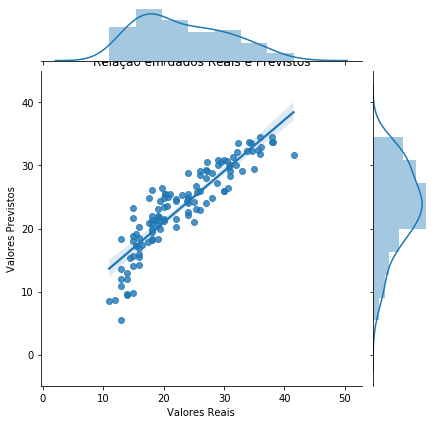

In [ ]:
# Plotar massa de dados
plt.figure(figsize = (15,12))
sb.jointplot(y_teste, predict_lr, kind = 'reg')
plt.ylabel('Valores Previstos')
plt.xlabel('Valores Reais')
plt.title('Relação em dados Reais e Previstos')
plt.show()

In [ ]:
# Resumo:
print('O modelo teve um aprendizado com R quadrado igual ',round(lr.score(X_teste, y_teste)*100), '%')
print('')
print('Os coeficientes demonstram a forte relação que explicam o aprendizado do modelo', resultado)

O modelo teve um aprendizado com R quadrado igual  80.0 %

Os coeficientes demonstram a forte relação que explicam o aprendizado do modelo               coeficientes
intercept        23.561441
cylinders        -0.305986
displacement      1.244701
horsepower       -0.662073
weight           -5.761717
accelaration      0.394685
model_year        2.754993


### <font color = '#006600'>Interpretação dos coeficientes para cada variável em relação a mpg (milhas por galão)</font>
    a) a cada cilindro que aumenta, diminui 0.305986 o rendimento do veículo/mpg
    b) quanto mais há deslocamento do motor, mais aumenta o rendimento em 1,244701/galão. Acontece que deveria ser o inverso. Veja o gráfico abaixo que mpg x displacment tem correlação negativa, quando um cresce o outro decresce e vice-versa. A primeira vista, há outliers que provocam distorção neste coeficiente.
    c) quanto maior a potencia do motor, menor o aproveitamento de mpg
    d) quanto mais pesado o veículo, menor o rendimento por mpg. Relação negativa e forte.
    e) quanto maior a aceleração, maior o aproveitamento em mpg.
    f) o ano do modelo do veículo tem relaçao positiva e forte. Quanto mais novo, melhor o rendimento mpg.

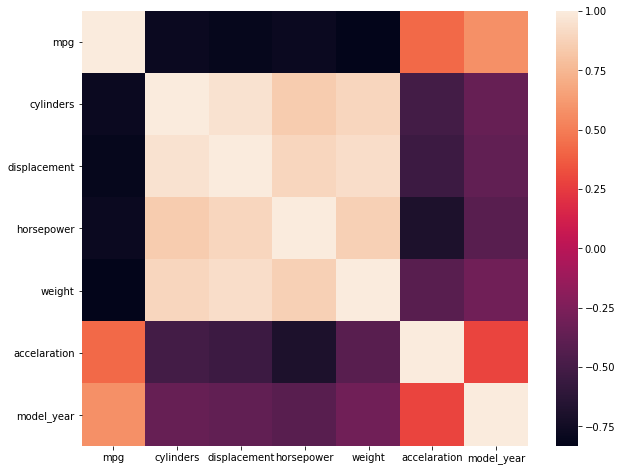

In [ ]:
# Gráfico de suporte à interpretação

corr = df.corr()
plt.figure(figsize = (10,8))
sb.heatmap(corr)

Text(0.5, 0.98, 'Relação Negativa entre MPG e DISPLACEMENT')

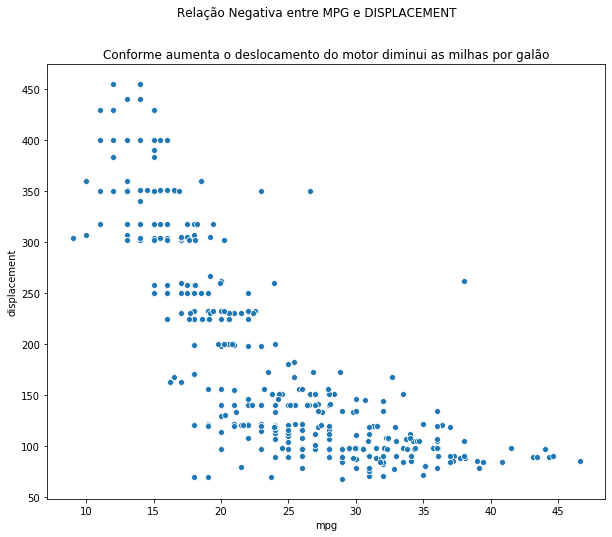

In [ ]:
# Gráfico de suporte à interpretação

plt.figure(figsize = (10,8))
sb.scatterplot(data = df, x = 'mpg', y = 'displacement')
plt.title('Conforme aumenta o deslocamento do motor diminui as milhas por galão')
plt.suptitle("Relação Negativa entre MPG e DISPLACEMENT")

# FIM